In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

FILE_PATH = "../shared_data_read_only/"
FILES = ("consumer_price_index.xlsx","Contacts.xlsx","Invoice and Opportunities.xlsx",
         "Items and Opportunities.xlsx","Non-Stock Items.xlsx","Opportunities.xlsx")

plt.rc("figure",figsize=(25,12))

In [ ]:
file_no = 4 # Invoice
df_invoice = pd.read_excel(f"{FILE_PATH}{FILES[file_no]}")
print(f"File : {FILES[file_no]}")
df_invoice.head()

In [14]:
file_no = 2 # Invoice
df_invoice = pd.read_excel(f"{FILE_PATH}{FILES[file_no]}")
print(f"File : {FILES[file_no]}")
df_invoice.head()

File : Invoice and Opportunities.xlsx


,Type,Reference Nbr.,Customer,Amount,Date,Opportunity ID
0,Invoice,FC0004608,C06507,5000.0,2023-10-10,4504
1,Invoice,FC0004607,C01388,241253.0,2023-10-09,1863
2,Invoice,FC0004605,C19104,83954.0,2023-10-06,5708
3,Invoice,FC0004600,C10528,3000.0,2023-06-23,5617
4,Invoice,FC0004598,C01196,54531.0,2023-10-09,5829


In [18]:
file_no = 4 # Invoice
df_item = pd.read_excel(f"{FILE_PATH}{FILES[file_no]}")
print(f"File : {FILES[file_no]}")
df_item.head()

File : Non-Stock Items.xlsx


,Inventory ID,Description EN,Posting Class,Tax Category,Base Unit,Item Status,Created On,Last Modified On,Default Price
0,CAMP001,"Henri LACHMANN room (1/2 day), fully equipped:...",CAMPUS,TVA 20,DEMI J,Active,2021-02-12 02:58:56.990,2022-08-23 13:01:01.627,126.0
1,CAMP002,"Salle Henri LACHMANN, fully-equipped room: vid...",CAMPUS,TVA 20,JOUR,Active,2021-02-12 02:58:57.430,2022-08-23 13:01:17.627,214.2
2,CAMP003,"Salle Olympique Lyonnais (1/2 day), fully equi...",CAMPUS,TVA 20,DEMI J,Active,2021-02-12 02:58:57.557,2022-08-23 13:01:28.037,252.0
3,CAMP004,"Salle Olympique Lyonnais, fully equipped room:...",CAMPUS,TVA 20,JOUR,Active,2021-02-12 02:58:57.683,2022-08-23 13:01:47.147,415.8
4,CAMP005,"Gol de Letra room (1/2 day), fully equipped: v...",CAMPUS,TVA 20,DEMI J,Active,2021-02-12 02:58:57.810,2022-08-23 13:01:55.207,252.0


In [19]:
file_no = 3 # Invoice
df_item_inv = pd.read_excel(f"{FILE_PATH}{FILES[file_no]}")
print(f"File : {FILES[file_no]}")
df_item_inv.head()

File : Items and Opportunities.xlsx


,Opportunity ID,Line Nbr.,Inventory ID,Year,Unit Price,Quantity,UOM,Ext. Price,Currency,Discount Amount,"Discount, %",Funded Program,Free Item,Tax Category
0,6387,1.0,EVEN001,2023.0,9000.0,1.0,PIECE,9000.0,EUR,0.0,0.0,Non specified,False,TVA0
1,6386,1.0,EVEN001,2023.0,9000.0,1.0,PIECE,9000.0,EUR,0.0,0.0,Non specified,False,TVA0
2,6385,1.0,DONPAR,2023.0,140.0,1.0,PIECE,140.0,EUR,0.0,0.0,Non specified,False,TVA0
3,6384,1.0,DONPAR,2023.0,350.0,1.0,PIECE,350.0,EUR,0.0,0.0,Non specified,False,TVA0
4,6383,1.0,DONPAR,2023.0,120.0,1.0,PIECE,120.0,EUR,0.0,0.0,Non specified,False,TVA0


In [20]:
df_item_full = pd.merge(df_item[["Inventory ID","Posting Class"]],df_item_inv[["Inventory ID","Opportunity ID"]],on="Inventory ID")

df_result = pd.merge(df_invoice,df_item_full,on="Opportunity ID").drop_duplicates().reset_index(drop=True)

In [21]:
df_result

,Type,Reference Nbr.,Customer,Amount,Date,Opportunity ID,Inventory ID,Posting Class
0,Invoice,FC0004608,C06507,5000.00,2023-10-10,4504,MECENAT,MECENAT
1,Invoice,FC0004607,C01388,241253.00,2023-10-09,1863,PARTPUB005,PARTPUB
2,Invoice,FC0001908,C01388,643340.00,2022-03-21,1863,PARTPUB005,PARTPUB
3,Invoice,FC0001883,C01388,643340.00,2021-03-21,1863,PARTPUB005,PARTPUB
4,Invoice,FC0004605,C19104,83954.00,2023-10-06,5708,CAMP026,CAMPUS
...,...,...,...,...,...,...,...,...
3602,Invoice,FC0000015,C00644,67.66,2021-03-01,1494,TAXEAPPR,TAXEAPP
3603,Invoice,FC0000003,C00644,67.66,2021-03-15,1494,TAXEAPPR,TAXEAPP
3604,Invoice,FC0000014,C00621,200000.00,2021-03-02,76,MECENAT,MECENAT
3605,Invoice,FC0000010,C00621,350000.00,2020-01-01,76,MECENAT,MECENAT


In [22]:
df_result['Posting Class'].unique()

array(['MECENAT', 'PARTPUB', 'CAMPUS', 'EVENT', 'DONPAR', 'TAXEAPP'],
      dtype=object)

In [23]:

df = df_result.groupby(by=["Date"]).agg({"Opportunity ID":"count","Amount":'sum',"Reference Nbr.":"count"}).sort_index().loc["2021-01-01":]

In [24]:
df_invoice_grouped_day = df.resample("W").sum().fillna(0)["Reference Nbr."]
df_invoice_grouped_day

Date
2021-01-10     1
2021-01-17     6
2021-01-24     6
2021-01-31     4
2021-02-07     5
              ..
2023-09-17    14
2023-09-24    24
2023-10-01    16
2023-10-08    14
2023-10-15     3
Freq: W-SUN, Name: Reference Nbr., Length: 145, dtype: int64

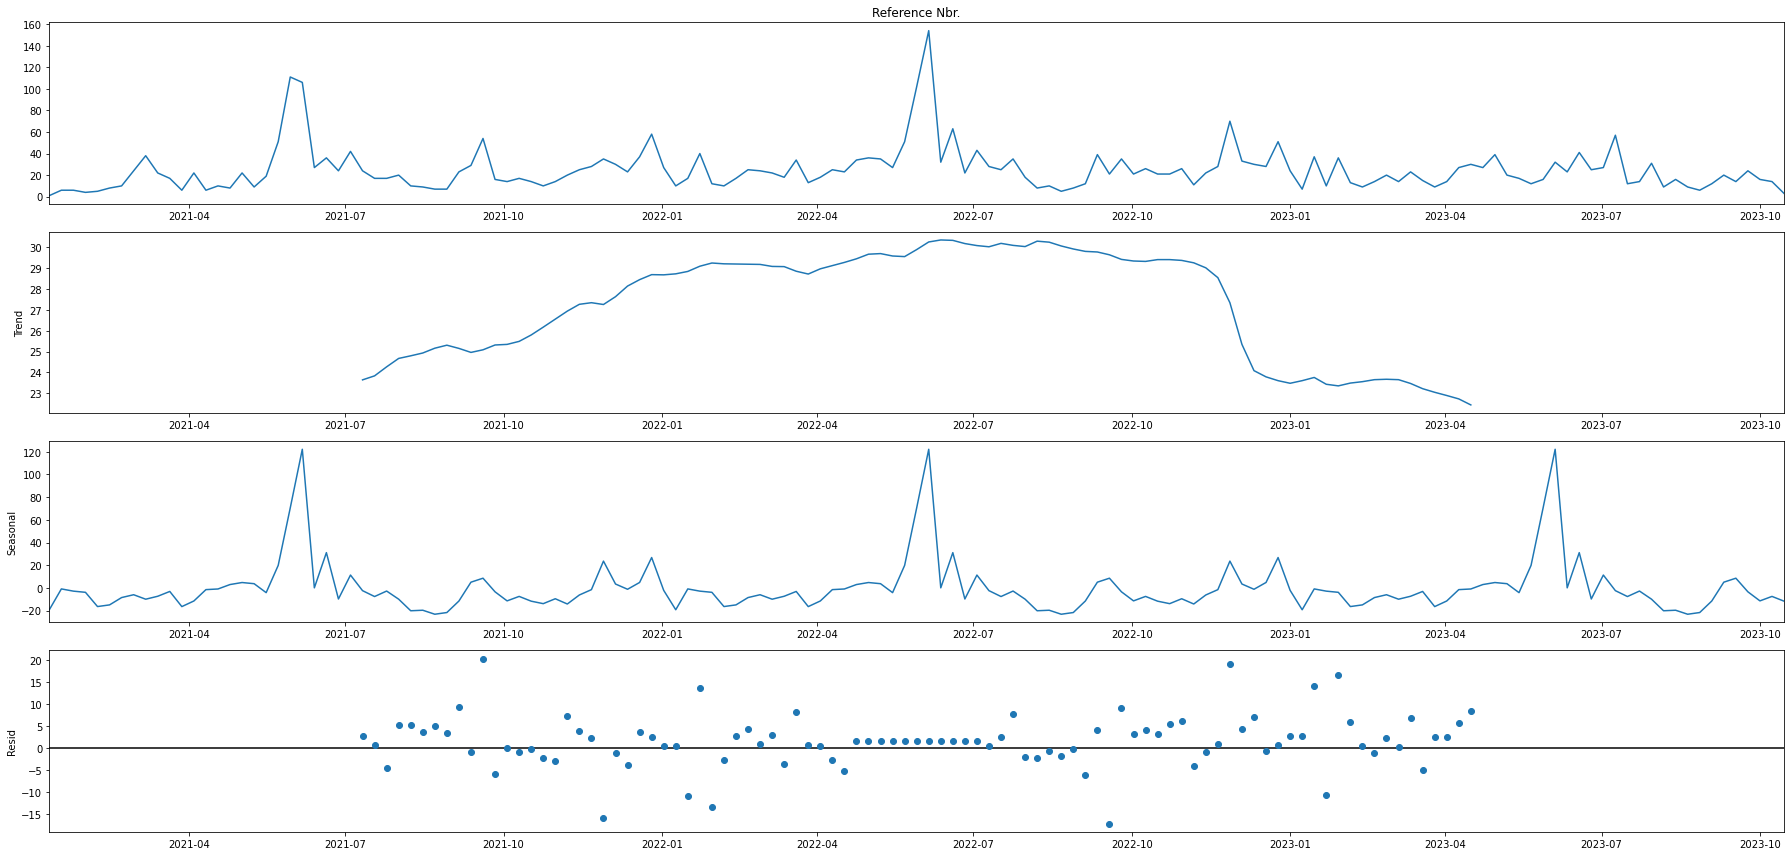

In [25]:
decomposition = sm.tsa.seasonal_decompose(df_invoice_grouped_day, model='additive')
decomposition.plot()
plt.show()

# For MECENAT

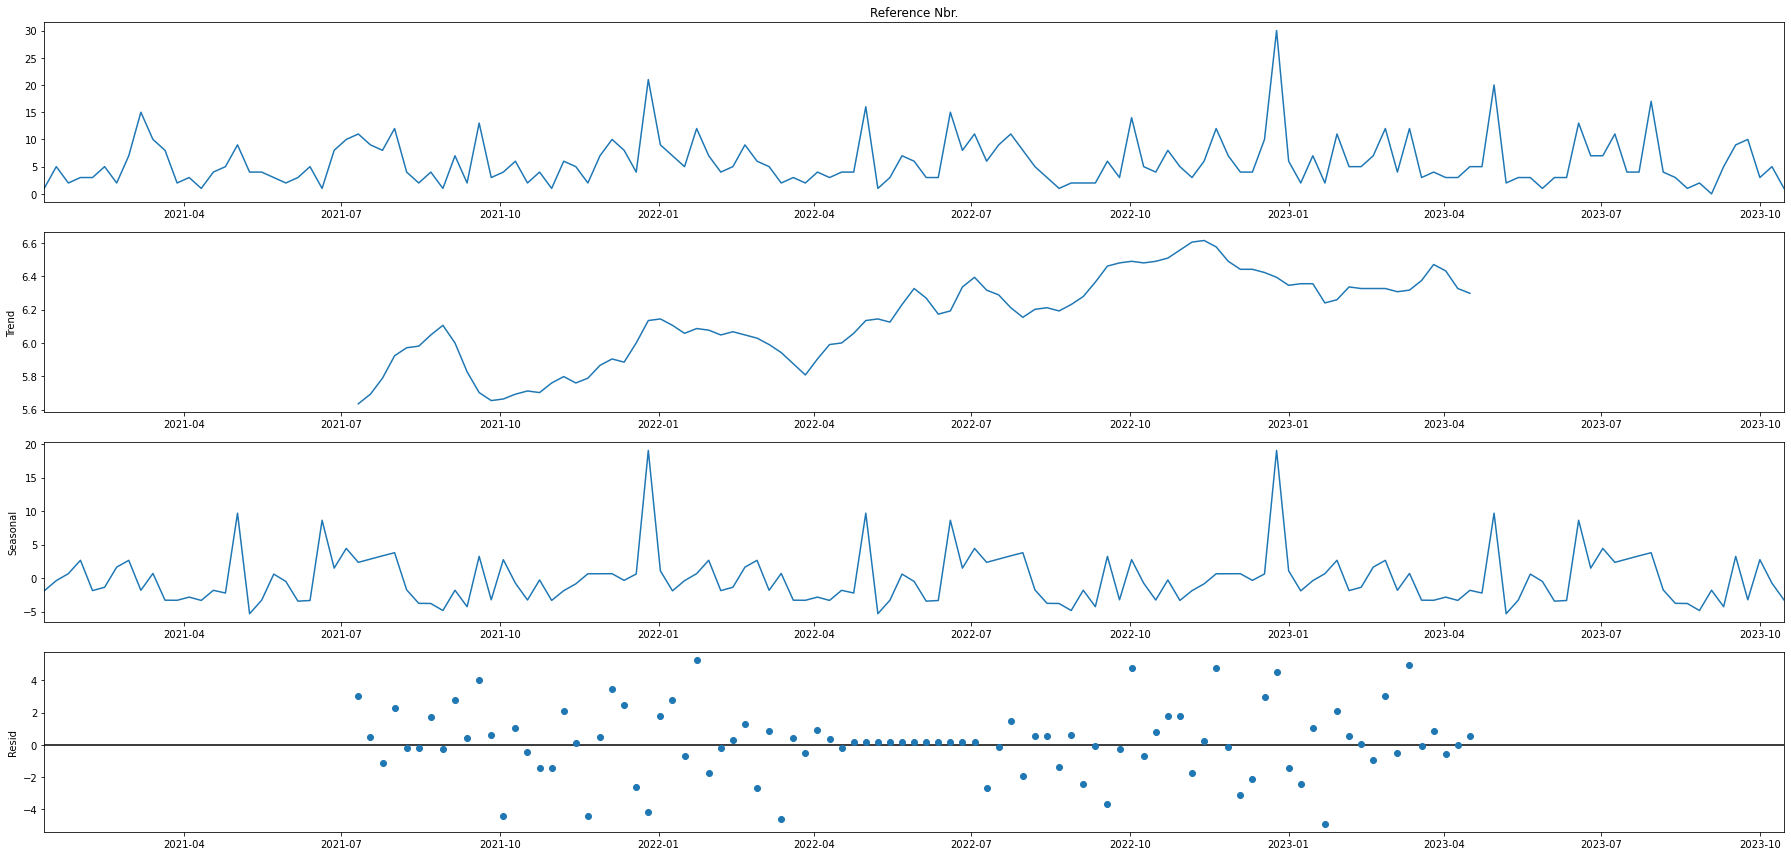

In [38]:
# ['MECENAT', 'PARTPUB', 'CAMPUS', 'EVENT', 'DONPAR', 'TAXEAPP']

to_keep = 'MECENAT'

df = df_result[df_result['Posting Class']==to_keep].groupby(by=["Date"]).agg({"Opportunity ID":"count","Amount":'sum',"Reference Nbr.":"count"}).sort_index().loc["2021-01-01":]
df_grouped_weekly = df.resample("W").sum().fillna(0)["Reference Nbr."]
decomposition = sm.tsa.seasonal_decompose(df_grouped_weekly, model='additive')
MECENAT_seasonality = decomposition.seasonal
decomposition.plot()
plt.show()

# For EVENT

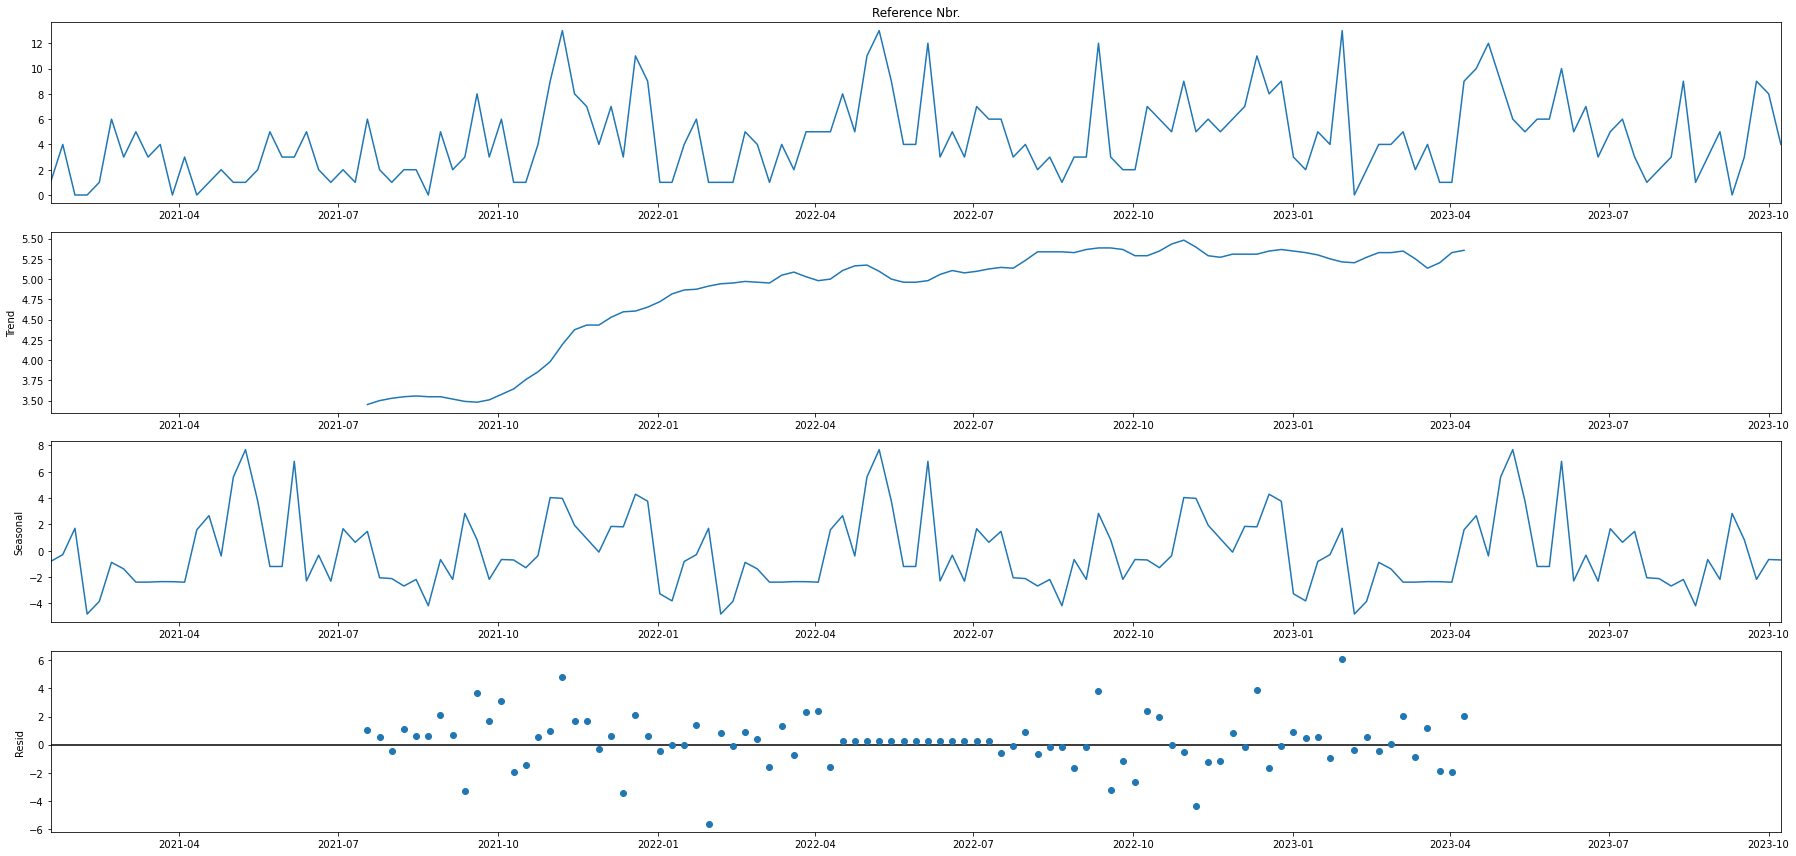

In [39]:
# ['MECENAT', 'PARTPUB', 'CAMPUS', 'EVENT', 'DONPAR', 'TAXEAPP']

to_keep = 'EVENT'

df = df_result[df_result['Posting Class']==to_keep].groupby(by=["Date"]).agg({"Opportunity ID":"count","Amount":'sum',"Reference Nbr.":"count"}).sort_index().loc["2021-01-01":]
df_grouped_weekly = df.resample("W").sum().fillna(0)["Reference Nbr."]
decomposition = sm.tsa.seasonal_decompose(df_grouped_weekly, model='additive')
EVENT_seasonality = decomposition.seasonal
decomposition.plot()
plt.show()

# For DONPAR

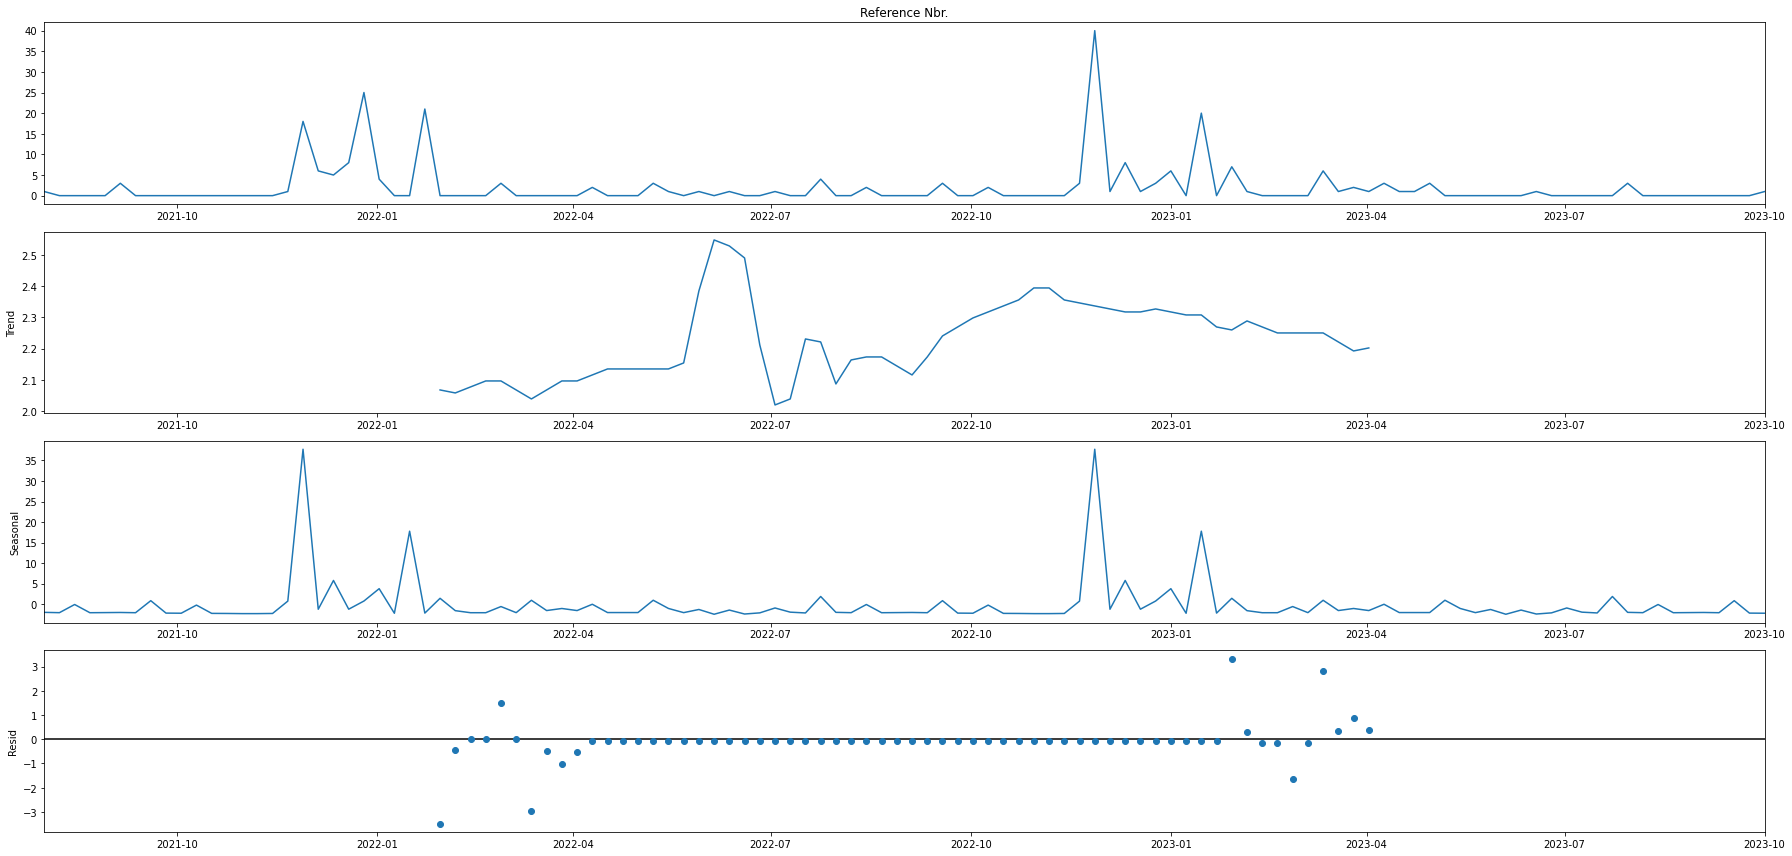

In [40]:

to_keep = 'DONPAR'

df = df_result[df_result['Posting Class']==to_keep].groupby(by=["Date"]).agg({"Opportunity ID":"count","Amount":'sum',"Reference Nbr.":"count"}).sort_index().loc["2021-01-01":]
df_grouped_weekly = df.resample("W").sum().fillna(0)["Reference Nbr."]
decomposition = sm.tsa.seasonal_decompose(df_grouped_weekly, model='additive')
DONPART_seasonality = decomposition.seasonal
decomposition.plot()
plt.show()

# For PARTPUB

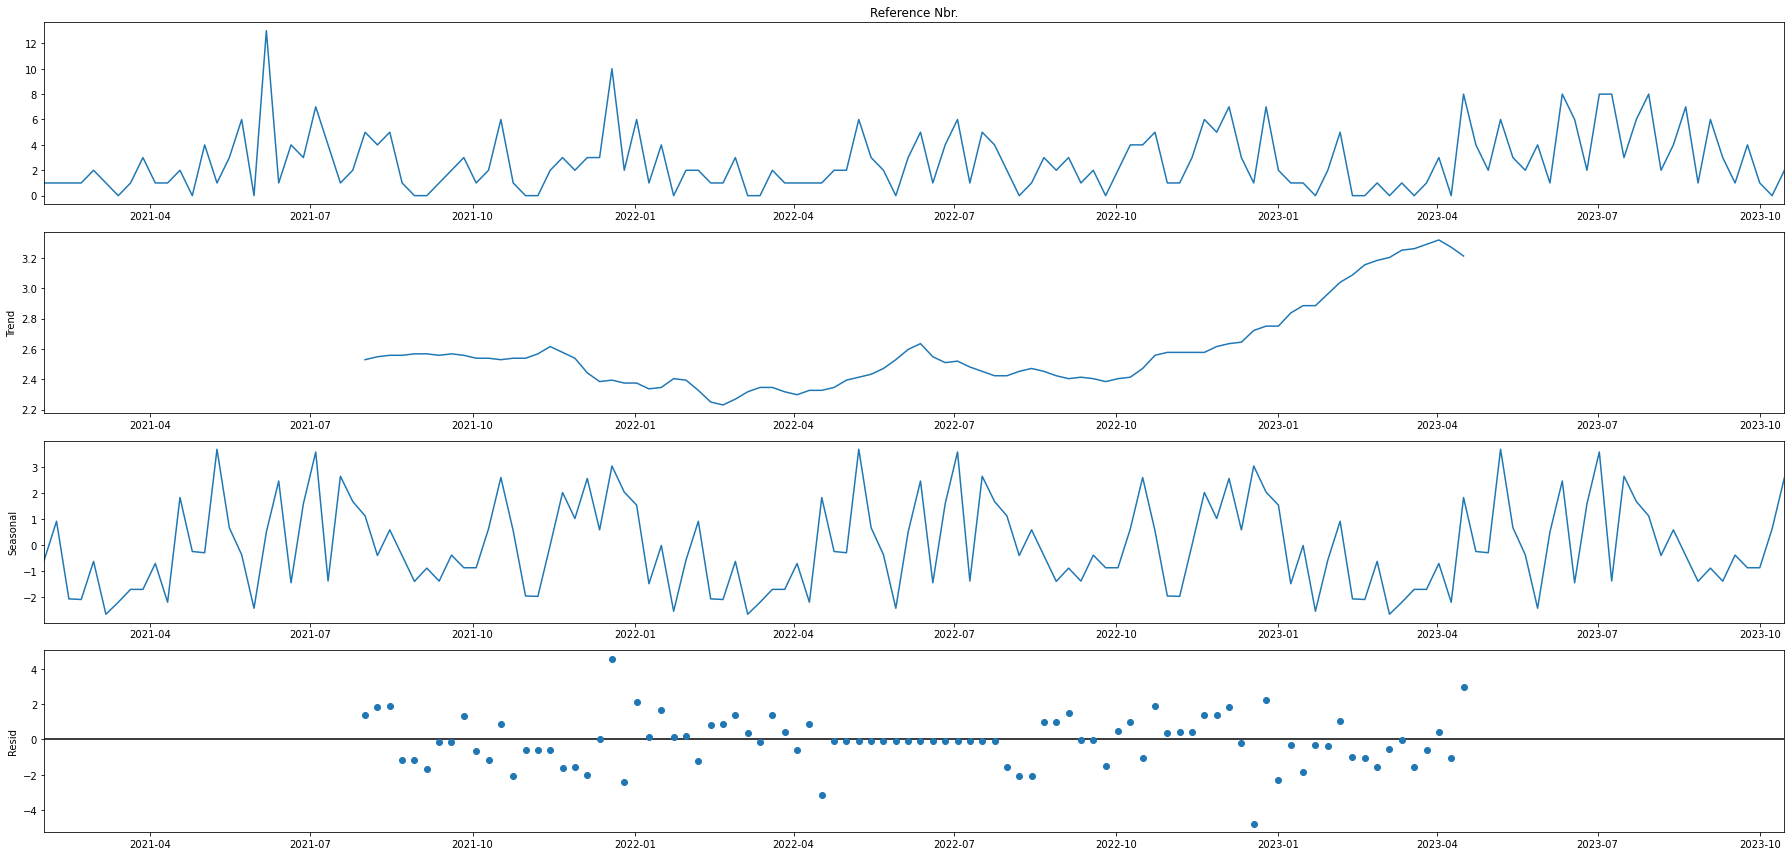

In [41]:



to_keep = 'PARTPUB'

df = df_result[df_result['Posting Class']==to_keep].groupby(by=["Date"]).agg({"Opportunity ID":"count","Amount":'sum',"Reference Nbr.":"count"}).sort_index().loc["2021-01-01":]
df_grouped_weekly = df.resample("W").sum().fillna(0)["Reference Nbr."]
decomposition = sm.tsa.seasonal_decompose(df_grouped_weekly, model='additive')
PARTPUB_seasonality = decomposition.seasonal
decomposition.plot()
plt.show()

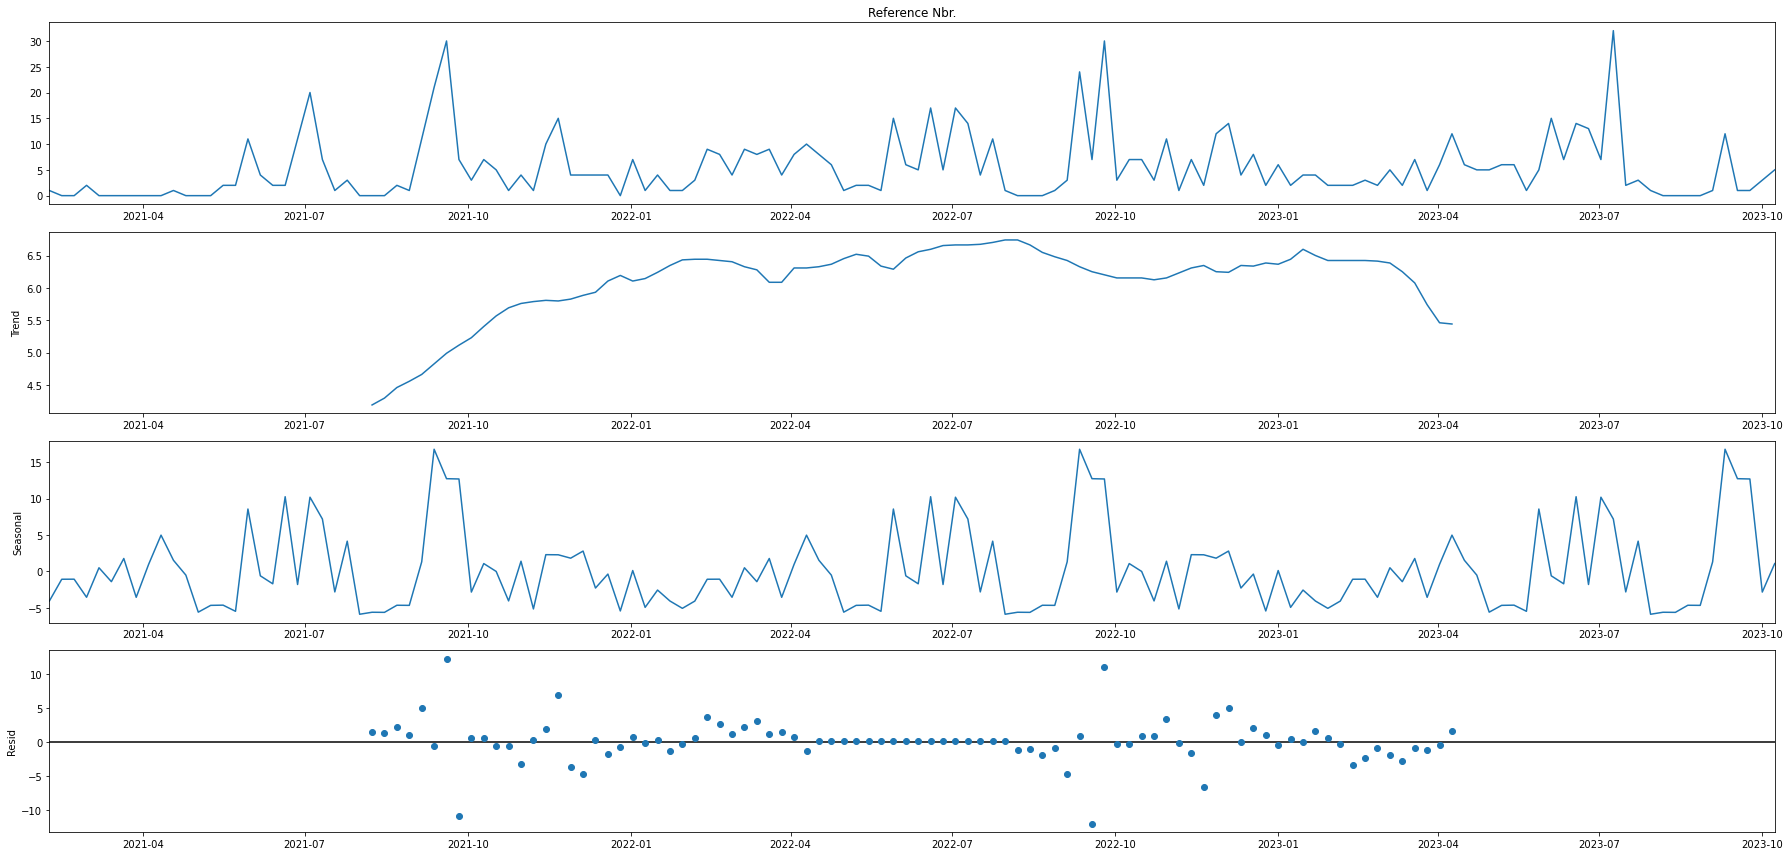

In [42]:



to_keep = 'CAMPUS'

df = df_result[df_result['Posting Class']==to_keep].groupby(by=["Date"]).agg({"Opportunity ID":"count","Amount":'sum',"Reference Nbr.":"count"}).sort_index().loc["2021-01-01":]
df_grouped_weekly = df.resample("W").sum().fillna(0)["Reference Nbr."]
decomposition = sm.tsa.seasonal_decompose(df_grouped_weekly, model='additive')

campus_seasonality = decomposition.seasonal
decomposition.plot()
plt.show()

In [37]:
decomposition.seasonal

Date
2021-02-07    -4.070821
2021-02-14    -1.070821
2021-02-21    -1.061206
2021-02-28    -3.546783
2021-03-07     0.506102
                ...    
2023-09-10    16.784948
2023-09-17    12.741679
2023-09-24    12.703217
2023-10-01    -2.830436
2023-10-08     1.083025
Freq: W-SUN, Name: seasonal, Length: 140, dtype: float64

In [ ]:
campus_seasonality

PARTPUB_seasonality

DONPART_seasonality

EVENT_seasonality

MECENAT_seasonality


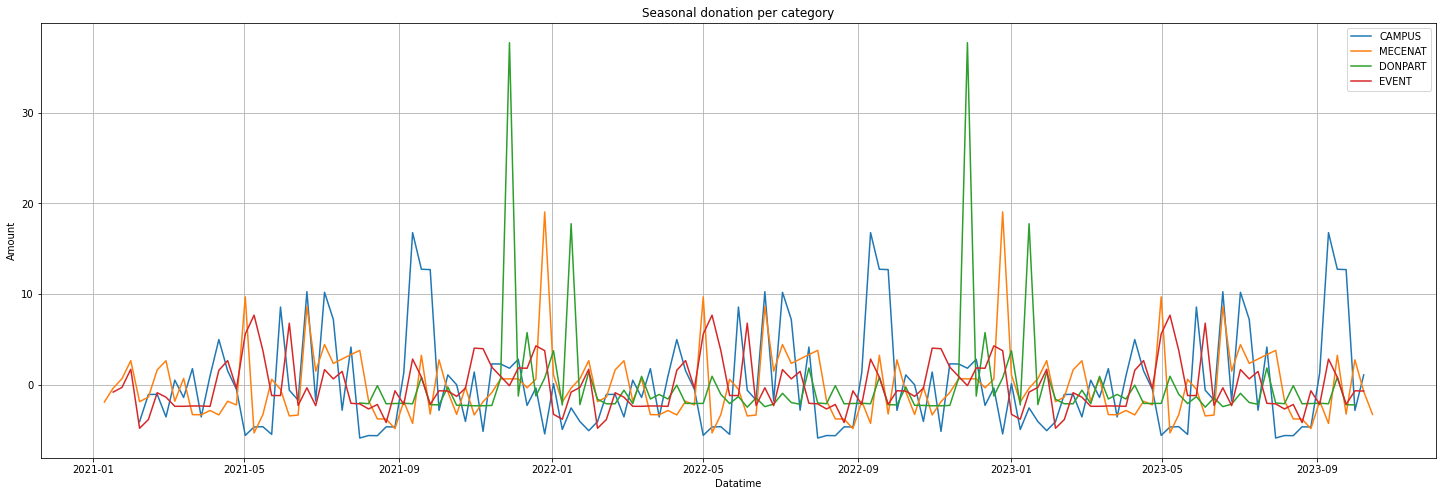

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(25, 8))

ax.plot(campus_seasonality,label='CAMPUS')
ax.plot(MECENAT_seasonality,label='MECENAT')
ax.plot(DONPART_seasonality,label='DONPART')
ax.plot(EVENT_seasonality,label='EVENT')
ax.set_title(f"Seasonal donation per category")
ax.yaxis.set_label_text("Amount")
ax.xaxis.set_label_text("Datatime")
ax.legend()
ax.grid()